In [2]:
from YOLOv8_Explainer import yolov8_heatmap, display_images
import matplotlib.pyplot as plt
from datasets import load_dataset
from matplotlib.pyplot import imshow
import cv2

In [3]:
# Initialize the YOLOv8 Explainer with Grad-CAM
model = yolov8_heatmap(
    weight="yolo_weights/yolov8SC.pt",  # Path to your YOLOv8 model weights
    conf_threshold=0.4,  # Confidence threshold for detections
    method="GradCAM",  # Use Grad-CAM instead of EigenCAM
    layer=[5, 10, 15, 20, -3],  # Target layers for Grad-CAM
    ratio=0.005,  # Ratio for heatmap overlay
    show_box=True,  # Show bounding boxes on the image
    renormalize=False,  # Do not renormalize the heatmap
)
dataset = load_dataset("marmal88/skin_cancer")
test_split = dataset["test"]

label_mapping = {
    "melanoma": "Malignant",
    "melanocytic_Nevi": "Malignant",
    "dermatofibroma": "Benign",
    "basal_cell_carcinoma": "Malignant",
    "vascular_lesions": "Benign",
    "actinic_keratoses": "Malignant",
    "benign_keratosis-like_lesions": "Benign"
}

Model summary: 129 layers, 11,136,374 parameters, 0 gradients, 28.6 GFLOPs


In [4]:
true_positives = [0, 4, 12, 14, 17, 18, 19, 21, 22, 25, 29, 30, 31, 35, 36, 37, 42, 43, 44, 46, 47, 48, 49, 52, 53, 54, 55, 57, 58, 59, 61, 62, 65, 66, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 87, 90, 91, 92, 95, 96, 97, 98, 100, 101, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 174, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 275, 276, 278, 279, 280, 282, 283, 284, 285, 286, 287, 288, 289, 291, 292, 293, 295, 296, 297, 298, 299, 300, 302, 303, 304, 305, 306, 307, 308, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 335, 336, 337, 339, 340, 341, 342, 343, 344, 346, 347, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 418, 419, 420, 421, 422, 423, 424, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 473, 474, 475, 477, 478, 479, 480, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 499, 500, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 570, 571, 572, 573, 574, 575, 576, 577, 578, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 608, 609, 610, 611, 612, 613, 615, 617, 618, 619, 620, 621, 622, 623, 624, 625, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 642, 643, 644, 646, 647, 648, 649, 650, 652, 653, 655, 656, 658, 660, 661, 662, 663, 664, 665, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 733, 734, 736, 737, 738, 739, 740, 741, 742, 743, 744, 746, 747, 748, 749, 750, 751, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 764, 765, 767, 768, 769, 770, 771, 772, 773, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 791, 792, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 809, 810, 811, 812, 814, 815, 817, 818, 819, 820, 821, 822, 823, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 859, 860, 862, 863, 864, 865, 866, 867, 868, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 884, 885, 886, 887, 888, 890, 891, 892, 894, 895, 896, 897, 898, 899, 901, 902, 903, 905, 906, 907, 908, 909, 910, 911, 913, 914, 915, 916, 917, 918, 919, 920, 922, 924, 925, 926, 927, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 944, 945, 946, 947, 948, 950, 952, 953, 954, 955, 956, 957, 958, 959, 961, 962, 963, 964, 966, 967, 968, 969, 971, 972, 973, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1004, 1005, 1006, 1007, 1008, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1025, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1036, 1037, 1038, 1039, 1041, 1042, 1043, 1044, 1045, 1046, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1064, 1065, 1067, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1087, 1088, 1089, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1118, 1119, 1120, 1121, 1123, 1126, 1128, 1129, 1130, 1133, 1134, 1136, 1139, 1141, 1143, 1146, 1150, 1151, 1152, 1153, 1155, 1157, 1158, 1161, 1162, 1163, 1164, 1165, 1167, 1172, 1176, 1177, 1178, 1179, 1181, 1182, 1184, 1185, 1186, 1190, 1192, 1195, 1198, 1199, 1200, 1203, 1204, 1205, 1206, 1207, 1208, 1209, 1210, 1213, 1217, 1219, 1221, 1222, 1223, 1224, 1225, 1227, 1228, 1229, 1231, 1232, 1233, 1234, 1235, 1237, 1238, 1239, 1241, 1242, 1244, 1245, 1246, 1247, 1248, 1249, 1253, 1255, 1256, 1257, 1259, 1260, 1261, 1262, 1263, 1264, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284]

Image 0
Image 4
Image 12
'int' object has no attribute 'backward'
Image 14
Image 17
Image 18
Image 19
Image 21
Image 22
'int' object has no attribute 'backward'
Image 25


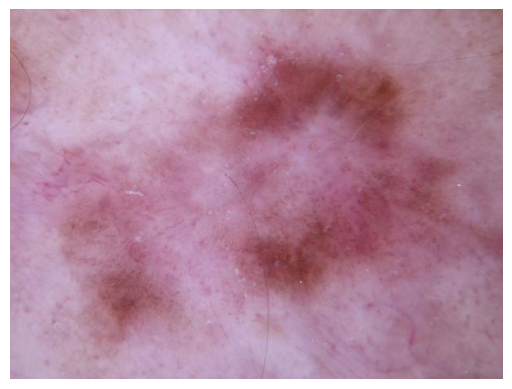

In [11]:

images = []
ground_truths = []
for i in true_positives[:10]:
    print(f"Image {i}")
    ground_truths.append(label_mapping[test_split[i]["dx"]])
    # Generate Grad-CAM heatmaps for an image
    try:
        images.append(model(
            img_path=f"true_positive_images/image_{i}.jpg",  # Path to your input image
        ))
    except Exception as e:
        print(f"Image {i} had the following error: {e}")
    img = cv2.imread(f"true_positive_images/image_{i}.jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels and ticks
    # plt.show()

Image 0, with Ground Truth: Malignant


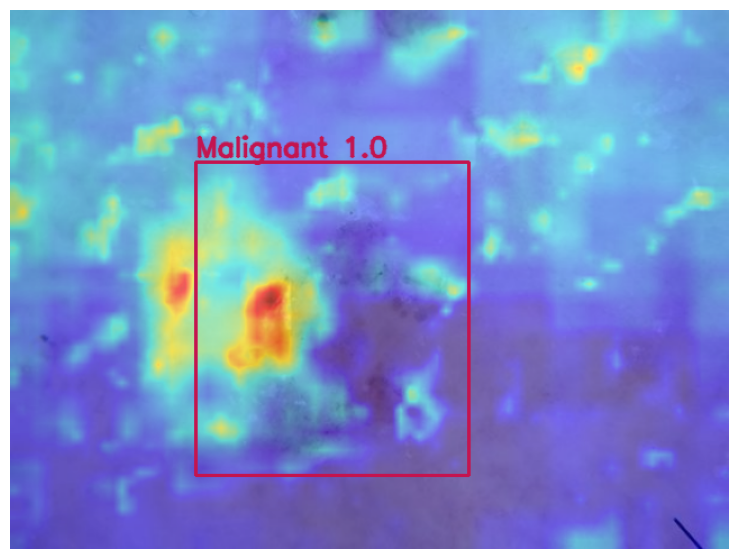

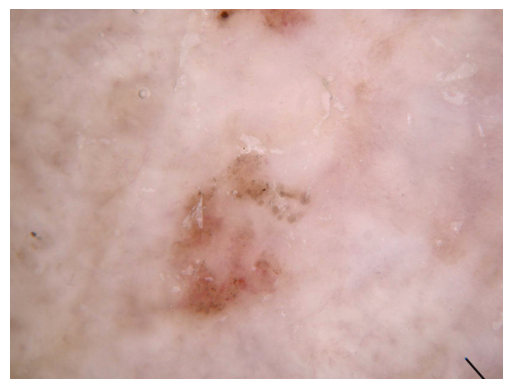

Image 1, with Ground Truth: Malignant


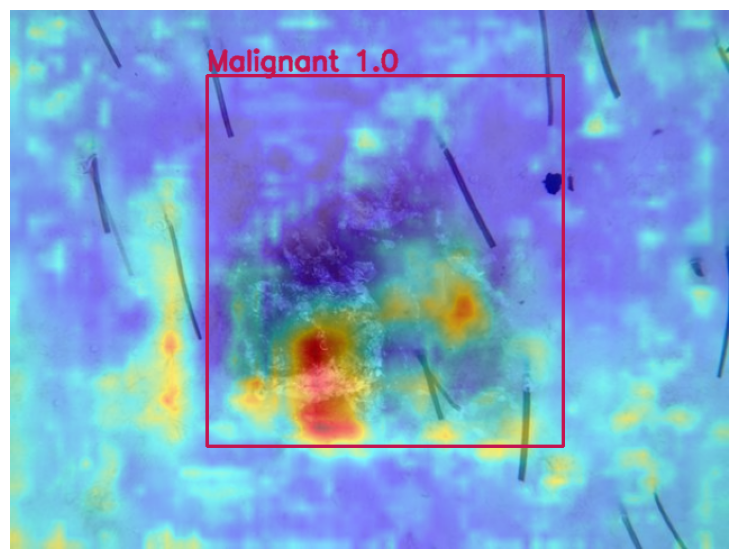

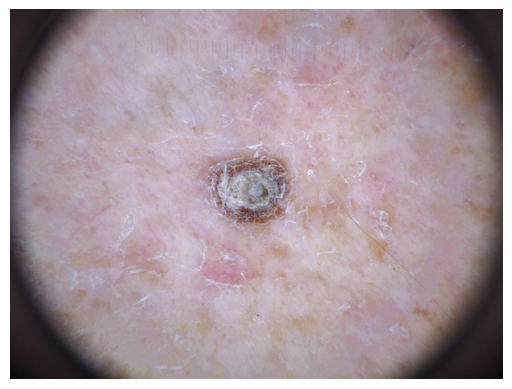

Image 3, with Ground Truth: Malignant


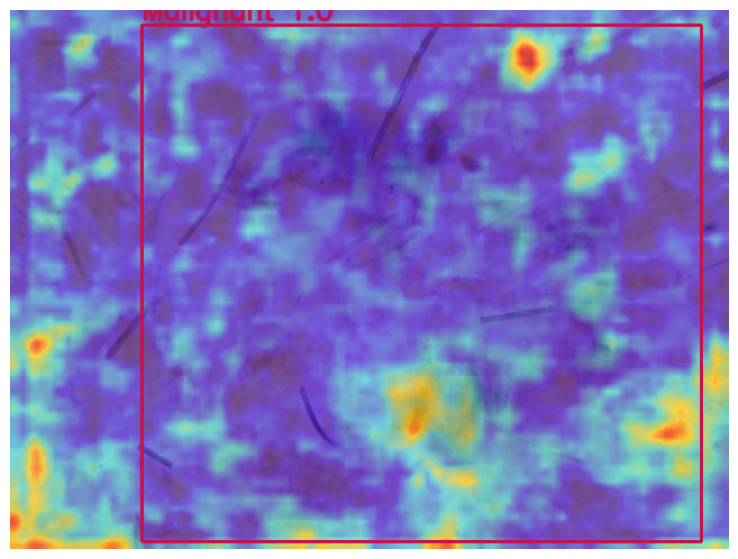

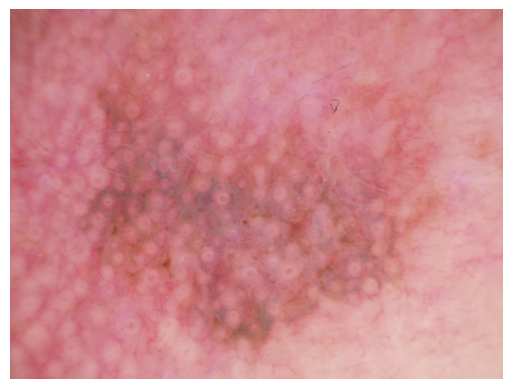

Image 4, with Ground Truth: Malignant


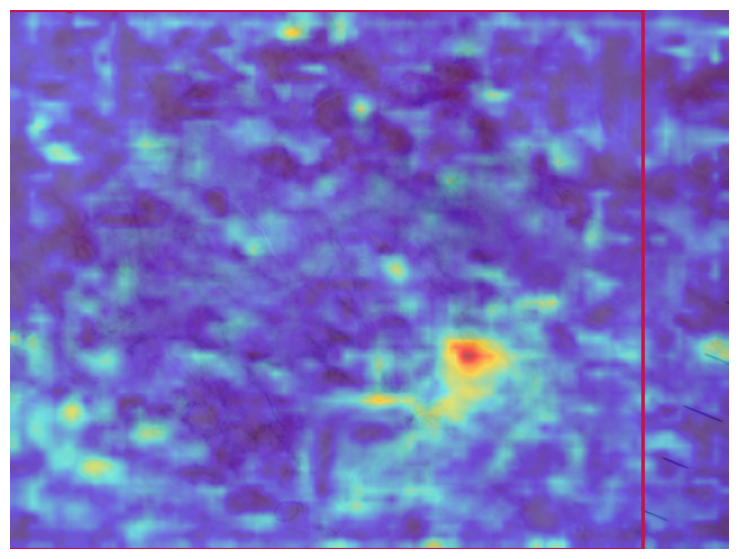

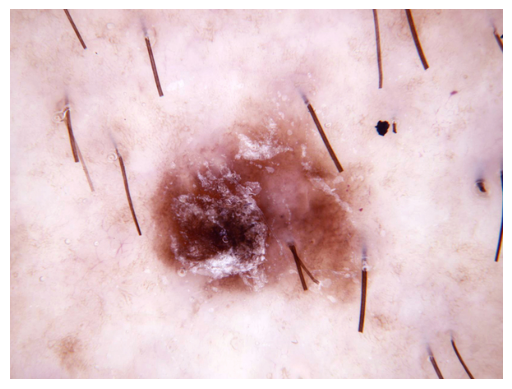

Image 5, with Ground Truth: Malignant


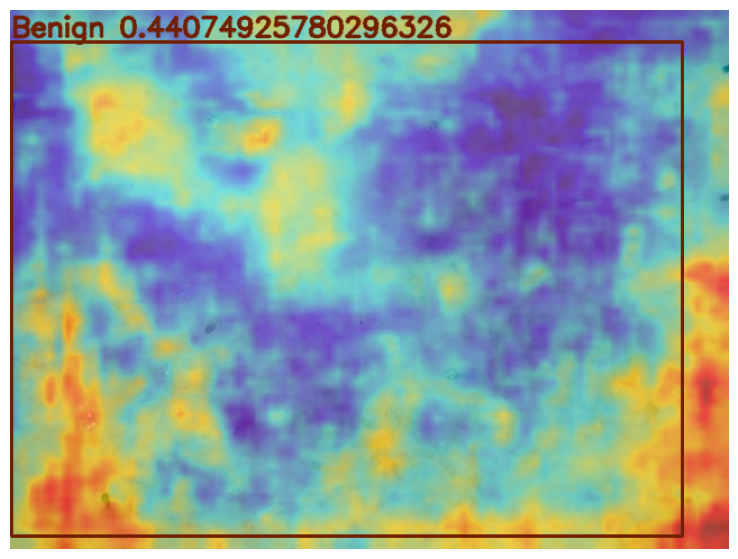

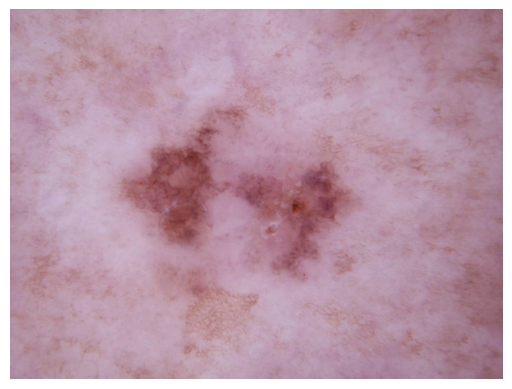

Image 6, with Ground Truth: Malignant


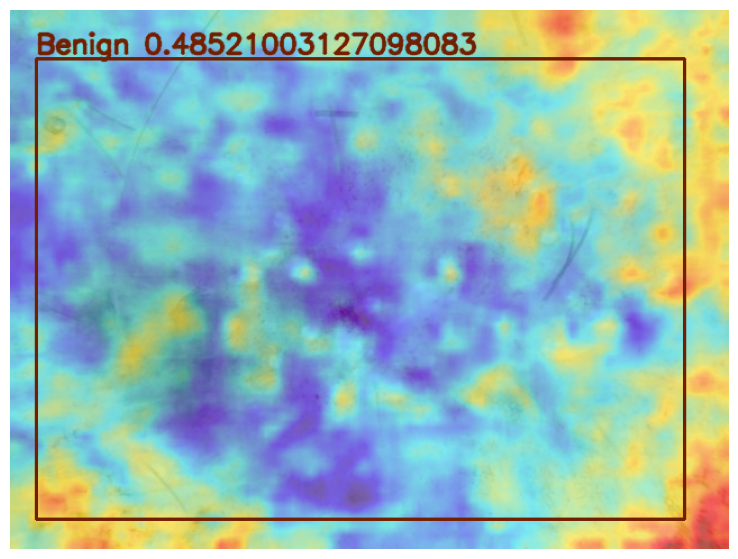

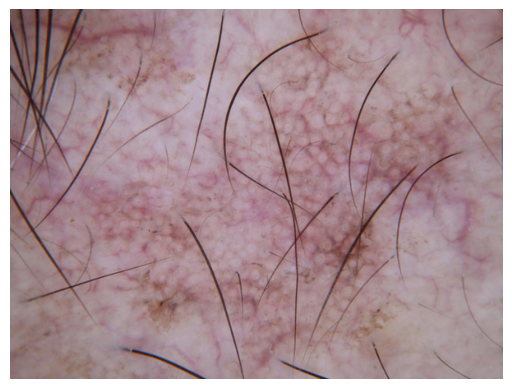

Image 7, with Ground Truth: Malignant


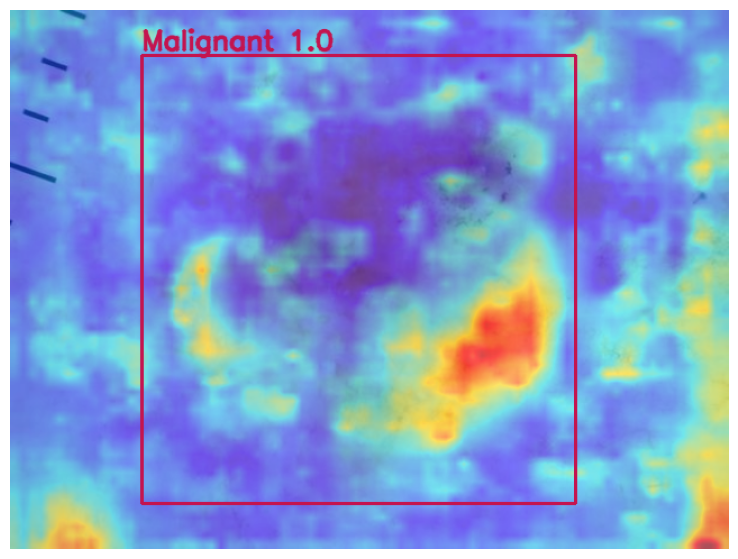

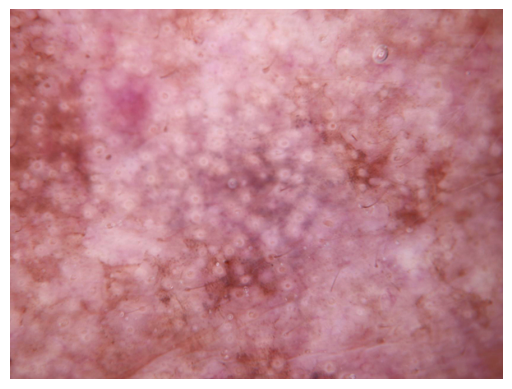

Image 9, with Ground Truth: Malignant


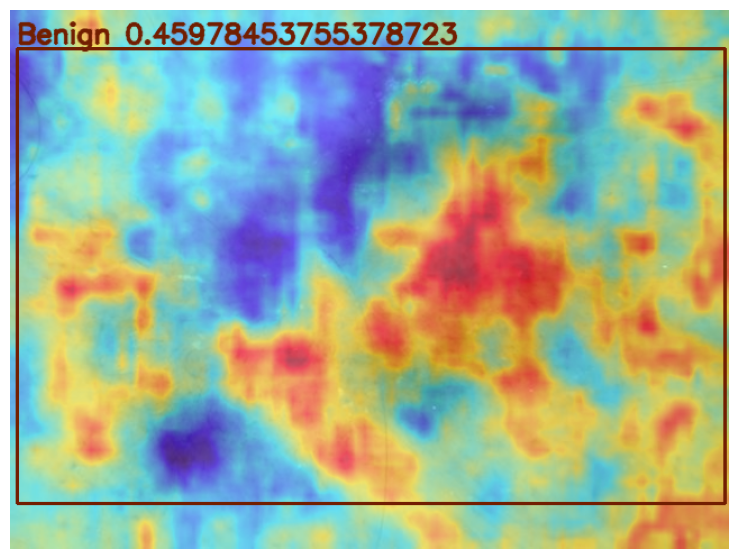

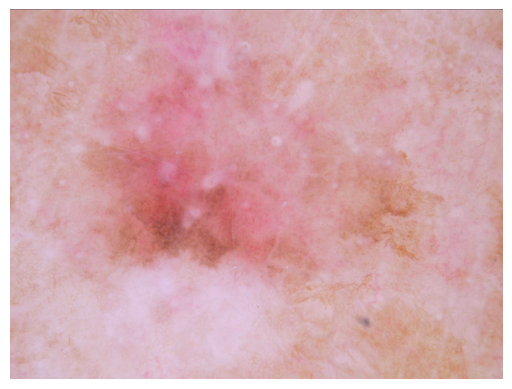

In [16]:
for i,image in enumerate(images):
    if (i == 2) or (i == 8):
        continue
    print(f"Image {i}, with Ground Truth: {ground_truths[i]}")
    display_images(image)
    img = cv2.imread(f"test_img/image_{i}.png")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels and ticks
    plt.show()

